# Project - Car price prediction using Decesion Tree, Random Forest & AdaBoost

In [9]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
A=pd.read_csv('C:/Users/HP/Desktop/CAR DETAILS FROM CAR DEKHO.csv')
A.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [14]:
A.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [16]:
X=A.drop(labels=['selling_price','name'],axis=1)
Y=A[['selling_price']]
X.head(10)

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,Petrol,Individual,Manual,First Owner
1,2007,50000,Petrol,Individual,Manual,First Owner
2,2012,100000,Diesel,Individual,Manual,First Owner
3,2017,46000,Petrol,Individual,Manual,First Owner
4,2014,141000,Diesel,Individual,Manual,Second Owner
5,2007,125000,Petrol,Individual,Manual,First Owner
6,2016,25000,Petrol,Individual,Manual,First Owner
7,2014,60000,Petrol,Individual,Manual,Second Owner
8,2015,25000,Petrol,Individual,Manual,First Owner
9,2017,78000,CNG,Individual,Manual,First Owner


In [20]:
Y.head(10)

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
5,140000
6,550000
7,240000
8,850000
9,365000


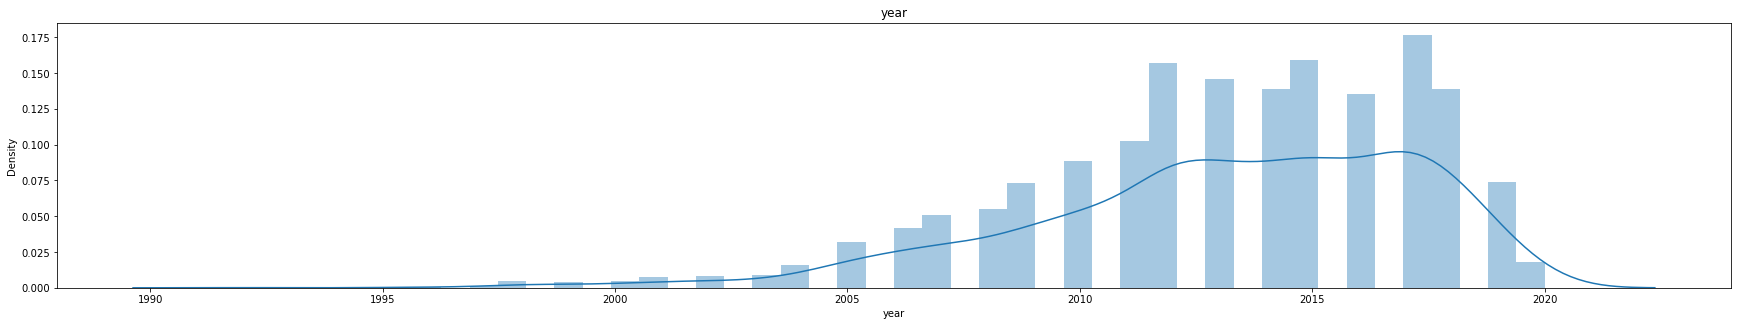

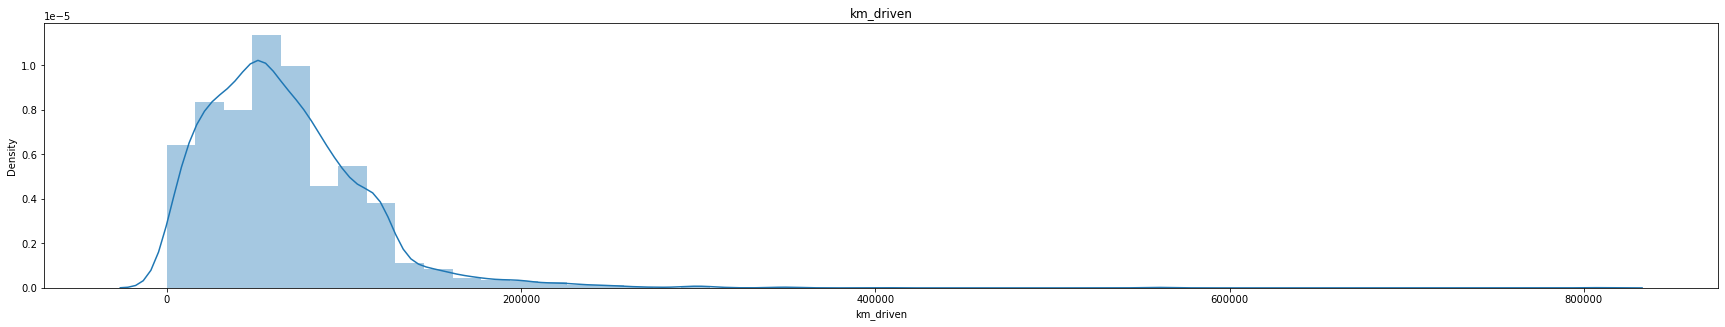

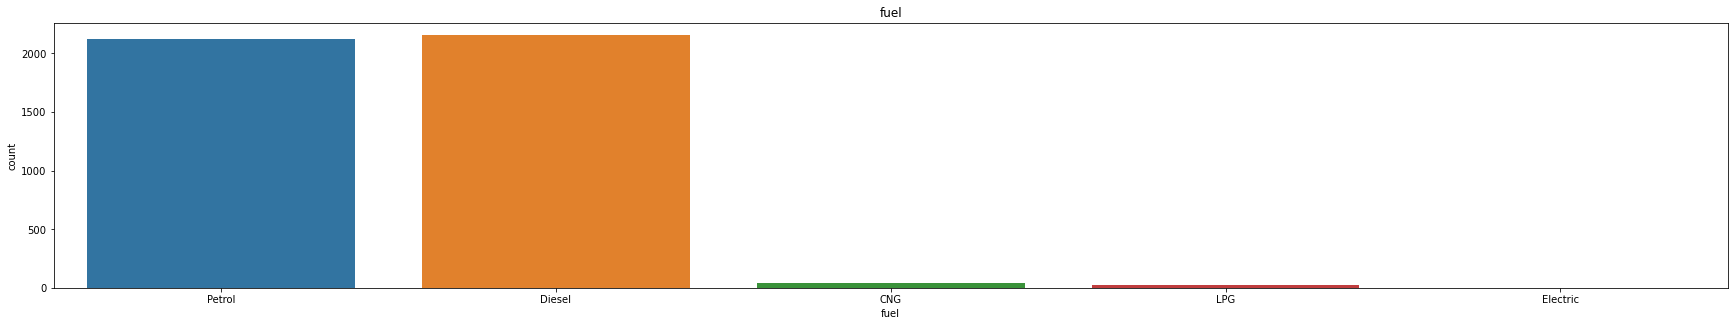

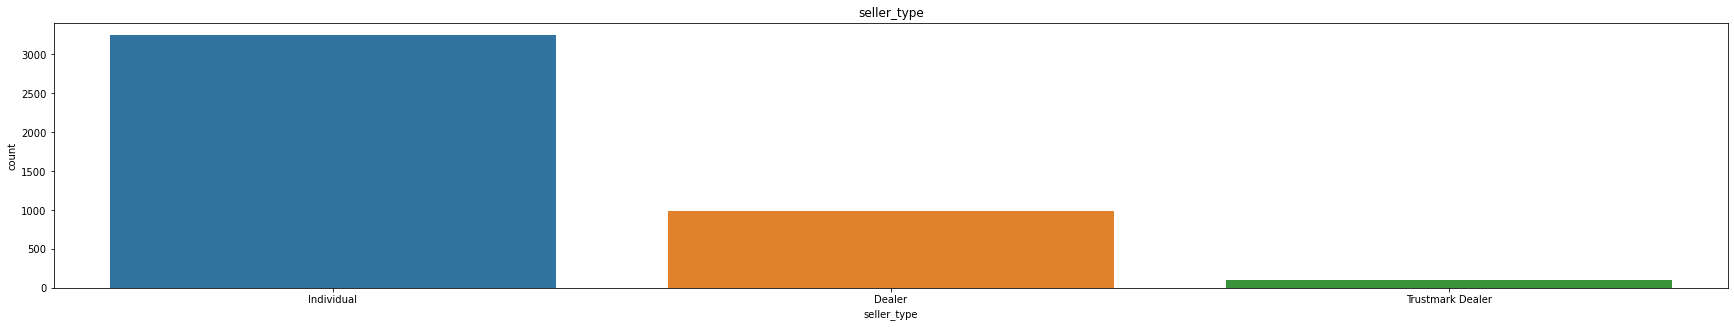

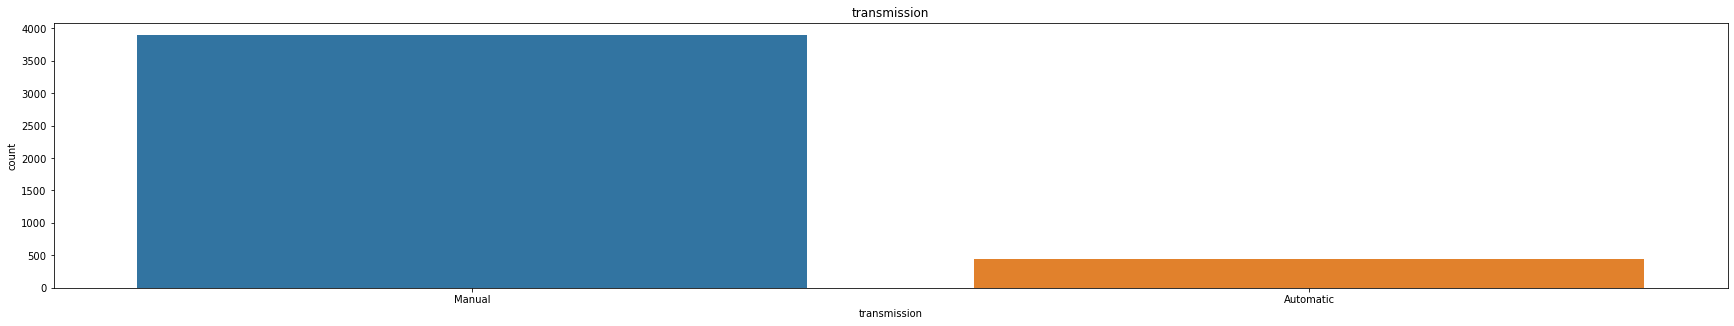

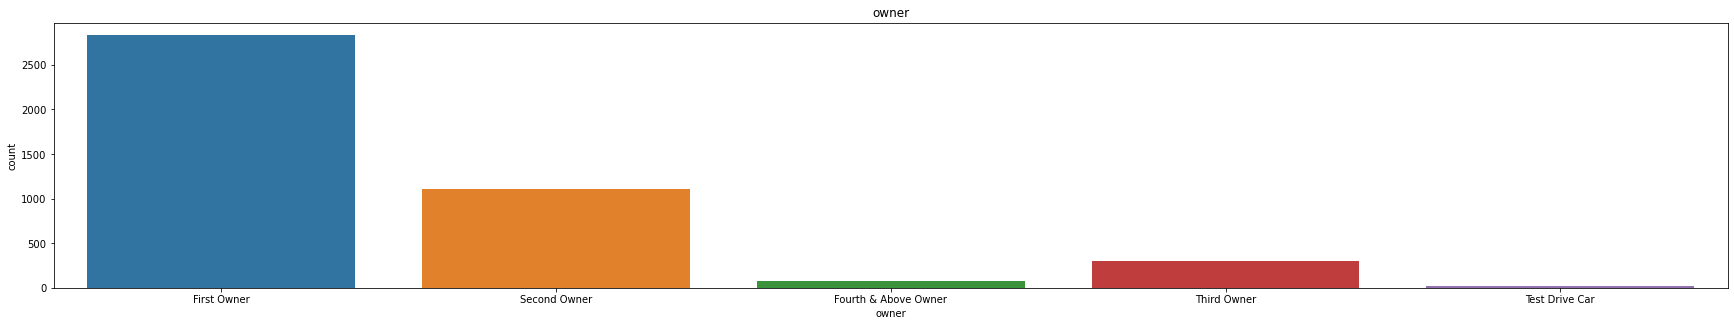

In [21]:
x=1
for i in X.columns:
    plt.figure(figsize=(30,40))
    if(X[i].dtypes=="object"):
        plt.subplot(7,1,x)
        x=x+1
        sb.countplot(X[i])
        plt.title(i)
    else:
        plt.subplot(7,1,x)
        x=x+1
        sb.distplot(X[i])
        plt.title(i)
            

### Scaling data using StandardScaler & One Hot Encoding

In [23]:
cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)
X1=pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Xnew=X2.join(X1)
Xnew.head(20)

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-1.445074,0.081139,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,-1.445074,-0.347689,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,-0.258795,0.724381,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,0.927485,-0.433455,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,0.215717,1.603479,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
5,-1.445074,1.260417,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
6,0.690229,-0.883724,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
7,0.215717,-0.133275,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8,0.452973,-0.883724,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
9,0.927485,0.252670,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0


### Spliting data into training and testing

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=23)

## Decision tree regressor for model

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=23)
model=dtr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
tr_err

47698.74349857611

In [19]:
ts_err

185163.84989431011

## PRUNING

### 1. Minimum samples Split

In [31]:
from sklearn.model_selection import GridSearchCV
tg={'min_samples_split':range(1,20,1)}
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 2}

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=23,min_samples_split=3)
model=dtr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  59239.64125203234 testing_error-->  190533.66210629168


### 2. Minimum Samples Leaf

In [33]:
from sklearn.model_selection import GridSearchCV
tg={'min_samples_leaf':range(1,20,1)}
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 5}

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=23,min_samples_leaf=5)
model=dtr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  130672.80044928877 testing_error-->  186982.42012869706


### 3. Maximum Depth

In [35]:
from sklearn.model_selection import GridSearchCV
tg={'max_depth':range(1,20,1)}
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 8}

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=23,max_depth=8)
model=dtr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  125517.76777829714 testing_error-->  185690.28939492904


##  Used Random Forest Regressor for model

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=23)
model=rfr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  85079.03642224571 testing_error-->  173616.2881267139


## Pruning in Random Forest

### 1. Maximum Depth

In [38]:
from sklearn.model_selection import GridSearchCV
tg={'max_depth':range(1,20,1)}
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 11}

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=23,max_depth=11)
model=rfr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  106458.90567847963 testing_error-->  172897.60699850222


### 2. Minimum Samples Splits

In [40]:
from sklearn.model_selection import GridSearchCV
tg={'min_samples_split':range(1,20,1)}
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 2}

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=23,min_samples_split=2)
model=rfr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  85079.03642224571 testing_error-->  173616.2881267139


### 3. Minimum Samples Leaf

In [42]:
from sklearn.model_selection import GridSearchCV
tg={'min_samples_leaf':range(1,20,1)}
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 2}

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=23,min_samples_leaf=2)
model=rfr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  111234.43421894443 testing_error-->  172892.30835011182


# Used Adaboost Algo for Model traning

In [44]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(DecisionTreeRegressor(random_state=23))
model=abr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  80909.89349602145 testing_error-->  177232.09140562452


## Pruning in AdaBoost

### 1. Maximum Depth

In [48]:
from sklearn.model_selection import GridSearchCV
tg={'n_estimators':range(1,50,1)}
cv=GridSearchCV(abr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_estimators': 9}

In [50]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(DecisionTreeRegressor(random_state=23,max_depth=8),n_estimators=9)
model=abr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err) 

training error-->  125183.91510270881 testing_error-->  179240.11250486365


# The best error i got ^

In [51]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(DecisionTreeRegressor(random_state=23,min_samples_split=2),n_estimators=9)
model=abr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  56138.16722535646 testing_error-->  184529.09300923822


In [52]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(DecisionTreeRegressor(random_state=23,min_samples_leaf=5),n_estimators=9)
model=abr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  109337.19483440657 testing_error-->  181723.0188164411


## I got best model accuracy on Adaboost regressor where i used n_estmators=9 and max_depth=8